In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv("/content/Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
dataset.shape

(10000, 14)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [6]:
dataset['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [7]:
dataset['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [9]:
# create dummy variables
geography = pd.get_dummies(X["Geography"], drop_first=True)
gender = pd.get_dummies(X["Gender"], drop_first=True)

In [11]:
# Concat dataframe
X = pd.concat([X, geography, gender], axis = 1)

In [13]:
# drop unnecessary variables
X = X.drop(["Geography", "Gender"], axis=1)

In [14]:
# splitting dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Let's create ANN

In [17]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU, PReLU, ELU
from keras.layers import Dropout

In [18]:
model = Sequential()

In [19]:
# adding input layers and hidden layers
model.add(Dense(units=6, kernel_initializer="he_uniform", activation="relu", input_dim=11))

In [20]:
# adding second hidden layers
model.add(Dense(units=6, kernel_initializer="he_uniform", activation="relu"))

In [21]:
# adding output layers
model.add(Dense(units=1, kernel_initializer="glorot_uniform", activation="sigmoid"))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [24]:
# compiling ANN
model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])

In [26]:
# Nfit the model
model_history = model.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=100)

Epoch 1/100
536/536 [==============================] - 3s 3ms/step - loss: 0.5190 - accuracy: 0.7841 - val_loss: 0.4693 - val_accuracy: 0.8016
Epoch 2/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4520 - accuracy: 0.8043 - val_loss: 0.4458 - val_accuracy: 0.8039
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4332 - accuracy: 0.8110 - val_loss: 0.4369 - val_accuracy: 0.8073
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4238 - accuracy: 0.8121 - val_loss: 0.4337 - val_accuracy: 0.8099
Epoch 5/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4182 - accuracy: 0.8182 - val_loss: 0.4302 - val_accuracy: 0.8114
Epoch 6/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4133 - accuracy: 0.8188 - val_loss: 0.4266 - val_accuracy: 0.8076
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4085 - accuracy: 0.8186 - val_loss: 0.4235 - val_accuracy: 0.8065

In [28]:
# predicting test data
y_pred = model.predict(X_test)
y_pred = (y_pred>0.5)

63/63 [==============================] - 0s 1ms/step


In [30]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1523   72]
 [ 210  195]]


In [31]:
# accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print(score)

0.859


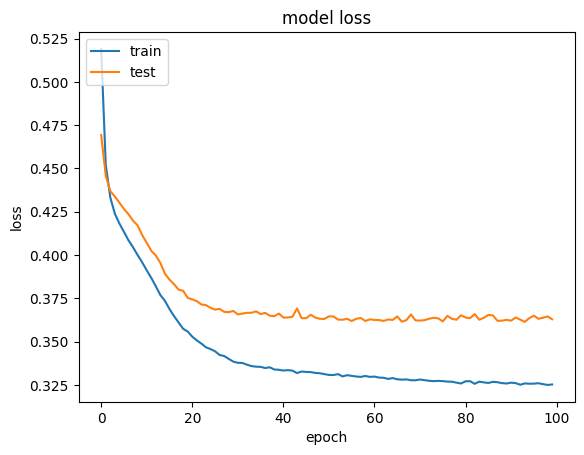

In [32]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title("model loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()